In [6]:
# Here we import all the packages to use througout the report
import pandas as pd
import numpy as np
import os.path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
os.chdir('C:\\Users\\correap\\Desktop')

In [8]:
#OPEN FILES
df=pd.read_csv('CSMH_m_4d_powerhotel_CSMHvirgin_4d_N_light__20181221T103859-2DeepCut_resnet50_SUPERTRAIN2Mar26shuffle1_1030000.csv')

In [9]:
df1=df.copy()

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 37 columns):
bodyparts            9551 non-null object
malehead             9551 non-null object
malehead.1           9551 non-null object
malehead.2           9551 non-null object
malecentroid         9551 non-null object
malecentroid.1       9551 non-null object
malecentroid.2       9551 non-null object
maleabdomen          9551 non-null object
maleabdomen.1        9551 non-null object
maleabdomen.2        9551 non-null object
maleproboscis        9551 non-null object
maleproboscis.1      9551 non-null object
maleproboscis.2      9551 non-null object
maleleftwing         9551 non-null object
maleleftwing.1       9551 non-null object
maleleftwing.2       9551 non-null object
malerightwing        9551 non-null object
malerightwing.1      9551 non-null object
malerightwing.2      9551 non-null object
femalehead           9551 non-null object
femalehead.1         9551 non-null object
femalehead.

In [10]:
df1.head()

,bodyparts,malehead,malehead.1,malehead.2,malecentroid,malecentroid.1,malecentroid.2,maleabdomen,maleabdomen.1,maleabdomen.2,...,femaleabdomen.2,femaleproboscis,femaleproboscis.1,femaleproboscis.2,femaleleftwing,femaleleftwing.1,femaleleftwing.2,femalerightwing,femalerightwing.1,femalerightwing.2
0,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
1,0,973.0249439,2.286430359,4.87E-06,971.9617087,1.31652379,2.44E-05,971.7532677,2.505292773,7.47E-06,...,4.63E-07,-3.332408905,-0.856920719,1.23E-06,-1.704792976,1.947850704,3.96E-07,968.8835032,3.974477027,2.65E-06
2,1,973.0249439,2.286430359,4.87E-06,971.9617087,1.31652379,2.44E-05,971.7532677,2.505292773,7.47E-06,...,4.63E-07,-3.332408905,-0.856920719,1.23E-06,-1.704792976,1.947850704,3.96E-07,968.8835032,3.974477027,2.65E-06
3,2,973.0249439,2.286430359,4.87E-06,971.9617087,1.31652379,2.44E-05,971.7532677,2.505292773,7.47E-06,...,4.63E-07,-3.332408905,-0.856920719,1.23E-06,-1.704792976,1.947850704,3.96E-07,968.8835032,3.974477027,2.65E-06
4,3,973.0249439,2.286430359,4.87E-06,971.9617087,1.31652379,2.44E-05,971.7532677,2.505292773,7.47E-06,...,4.63E-07,-3.332408905,-0.856920719,1.23E-06,-1.704792976,1.947850704,3.96E-07,968.8835032,3.974477027,2.65E-06


In [11]:
#for now we will drop the first row as it doesnt really tells much... just know you have x, y and PRob 
df2=df1.drop(df.index[0])

In [19]:
df3=df2.astype('float')

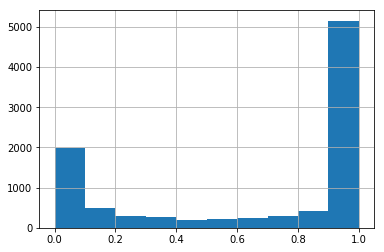

In [38]:
#here shows that the likelihood of prediction i variable.. nonetheless we can just see what happens
#if you group by 'good' likelehood
df3['malehead.2'].hist()

In [50]:
#USE THIS to figure out head movemnets
df3_cleanH = df3[df3['malehead.2'] >0.8]

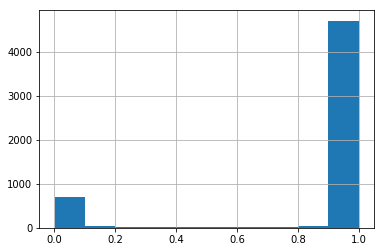

In [40]:
df3_clean['maleabdomen.2'].hist()

,bodyparts,malehead,malehead.1,malehead.2,malecentroid,malecentroid.1,malecentroid.2,maleabdomen,maleabdomen.1,maleabdomen.2,...,femaleabdomen.2,femaleproboscis,femaleproboscis.1,femaleproboscis.2,femaleleftwing,femaleleftwing.1,femaleleftwing.2,femalerightwing,femalerightwing.1,femalerightwing.2
33,32.0,366.375318,627.240469,0.999982,310.734858,639.764759,0.999888,645.393733,270.622801,1.000000,...,0.998831,511.836525,240.182103,1.000000,692.907962,286.598834,0.984726,690.209812,289.130115,0.798312
39,38.0,468.825078,632.569911,0.951251,417.895291,648.426005,0.999513,623.561378,266.700773,0.999999,...,0.992397,487.763936,233.308542,1.000000,669.187998,280.918029,0.971209,408.063561,672.105911,0.743933
40,39.0,480.937543,601.787795,0.916927,427.488527,620.262573,0.999987,623.943008,267.393615,0.999999,...,0.985605,488.388392,233.838773,1.000000,669.450496,280.777412,0.974346,668.838195,285.304072,0.753724
44,43.0,458.194334,442.512848,0.980355,430.958221,500.168770,0.929970,624.120715,266.891120,0.999997,...,0.998293,490.561469,233.910991,1.000000,670.642788,280.074084,0.992515,668.064420,284.207798,0.809200
46,45.0,434.216367,372.099632,0.870428,548.492348,251.077603,0.538755,623.832612,266.245425,0.999998,...,0.998275,492.364913,233.494203,1.000000,672.313619,279.737675,0.994316,670.380418,283.956426,0.756998
47,46.0,420.970331,341.310673,0.819955,549.529587,251.098060,0.407273,624.510470,266.447932,0.999999,...,0.998872,493.435978,233.983584,1.000000,673.165118,279.679114,0.997043,671.055916,284.044930,0.911993
51,50.0,347.730611,214.877187,0.999124,376.313733,271.350083,0.999998,625.681617,263.915822,0.999999,...,0.995338,492.959647,235.084243,1.000000,673.235645,278.368204,0.996698,671.598702,280.871869,0.768361
52,51.0,307.178290,227.832247,0.999996,347.673038,282.965352,1.000000,625.332382,265.078697,1.000000,...,0.996172,492.293011,234.936879,1.000000,673.393047,278.892367,0.994061,671.971458,281.446901,0.706934
53,52.0,287.023414,213.490771,0.999998,325.941437,271.575915,1.000000,372.479545,325.624911,0.999992,...,0.998695,489.242478,232.917828,1.000000,670.495951,277.926969,0.994968,668.352517,281.079255,0.907293
59,58.0,462.671273,178.939383,0.999981,418.800579,219.951303,0.298939,611.719605,262.226766,0.999999,...,0.997783,474.289400,229.938355,0.866054,657.055520,275.195926,0.998891,656.126150,274.882246,0.844450


Text(0,0.5,'Male head X (a.u.)')

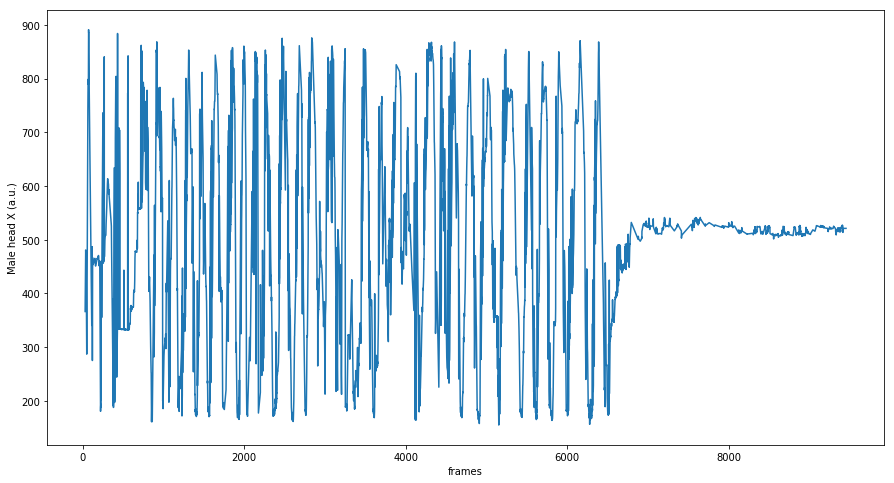

In [48]:
x = df3_clean['bodyparts']
y = df3_clean['malehead']
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.xlabel('frames')
plt.ylabel('Male head X (a.u.)')

Text(0,0.5,'Male head Y (a.u.)')

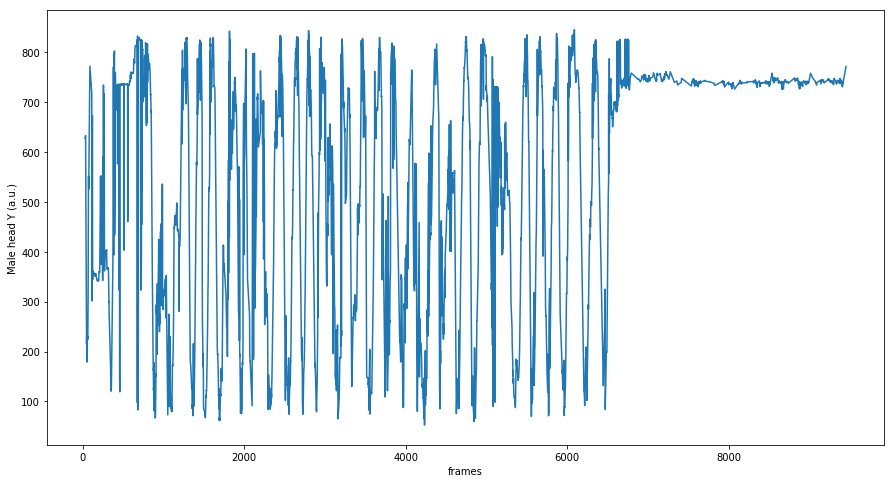

In [49]:
x = df3_clean['bodyparts']
y = df3_clean['malehead.1']
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.xlabel('frames')
plt.ylabel('Male head Y (a.u.)')

In [51]:
#USE THIS to figure out abdomen movemnets
df3_cleanAB = df3[df3['maleabdomen.2'] >0.8]

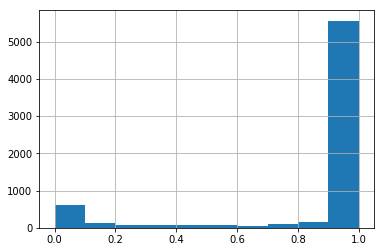

In [56]:
df3_cleanAB['malecentroid.2'].hist()

Text(0,0.5,'Male head X (a.u.)')

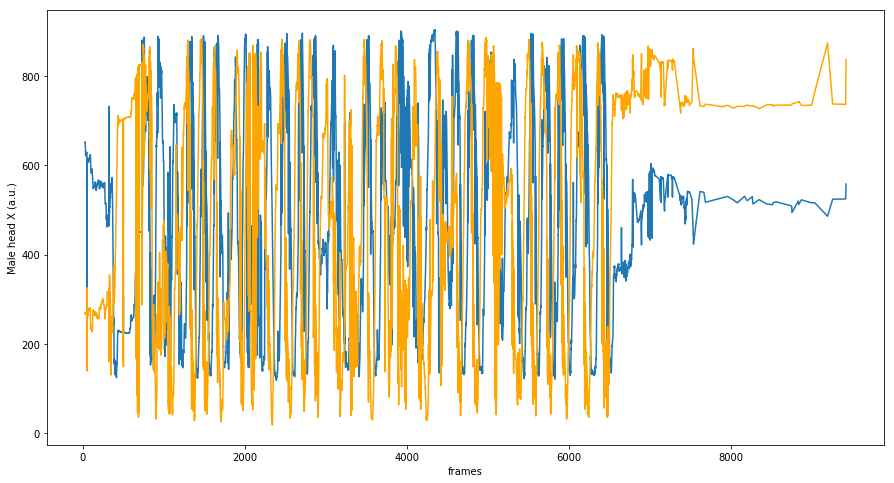

In [55]:
x = df3_cleanAB['bodyparts']
y = df3_cleanAB['maleabdomen']
z = df3_cleanAB['maleabdomen.1']
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.plot(x,z, color='orange')
plt.xlabel('frames')
plt.ylabel('Male head X (a.u.)')

In [60]:
#here im calculating tghe difference between centroid and abdomen X and Y position
df3_cleanAB['abX'] = df3_cleanAB['maleabdomen'] - df3_cleanAB['malecentroid']
df3_cleanAB['abY'] = df3_cleanAB['maleabdomen.1'] - df3_cleanAB['malecentroid.1']

C:\Users\correap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\correap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Male ab-centroid X (a.u.)')

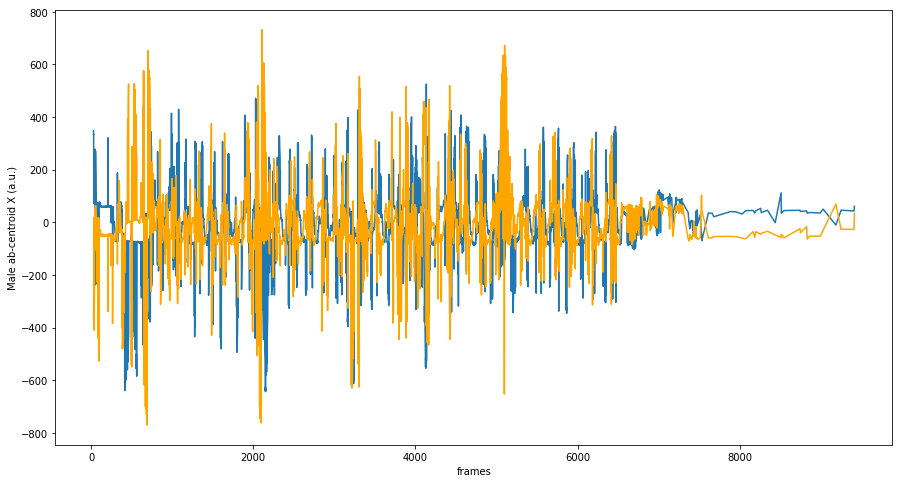

In [61]:
x = df3_cleanAB['bodyparts']
y = df3_cleanAB['abX']
z = df3_cleanAB['abY']
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.plot(x,z, color='orange')
plt.xlabel('frames')
plt.ylabel('Male ab-centroid X (a.u.)')

In [65]:
df3_cleanAB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 31 to 9416
Data columns (total 39 columns):
bodyparts            6894 non-null float64
malehead             6894 non-null float64
malehead.1           6894 non-null float64
malehead.2           6894 non-null float64
malecentroid         6894 non-null float64
malecentroid.1       6894 non-null float64
malecentroid.2       6894 non-null float64
maleabdomen          6894 non-null float64
maleabdomen.1        6894 non-null float64
maleabdomen.2        6894 non-null float64
maleproboscis        6894 non-null float64
maleproboscis.1      6894 non-null float64
maleproboscis.2      6894 non-null float64
maleleftwing         6894 non-null float64
maleleftwing.1       6894 non-null float64
maleleftwing.2       6894 non-null float64
malerightwing        6894 non-null float64
malerightwing.1      6894 non-null float64
malerightwing.2      6894 non-null float64
femalehead           6894 non-null float64
femalehead.1         6894 non-nu